In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()
from scipy import stats

1. Naive Bayes is generative classification: determine the distribution of each class, *generate the model*, probabilisically determine the labels
2. Support Vector Machines is discriminative classification: draw a border to classify. It is a maximum margin estimator
3. To fit nonlinear relationship, SVM uses radial *basis function*. To automatically find the best basis function, **kernel transformation**, a type of basis function transformation is used. A basis function centered at each point is computed and the SVM will sift through the results.
4. As it is computationally intensive to project $N$ points in $N$ dimensions, **kernel trick** is applied to avoid the actual need for building the $N$-dimensional representation of kernel projection -- A fit on kernel-transformed data can be done implicitly.
  
### Advantages
1. Their dependence on relatively few support vectors which means that they are very compact models, and take up very little memory.
2. Once the model is trained, the prediction phase is very fast.
3. Because they are affected only by points near the margin, they work well with high-dimensional data — even data with more dimensions than samples, which is a challenging regime for other algorithms.
4. Their integration with kernel methods makes them very versatile, able to adapt to many types of data.  
  
### Disadvantages
1. High Time Complexity
2. Results are "strongly dependent" on the tuning parameter C. Determination of optimal C is costly as dataset size grows.
3. The results do not have a direct probabilistic interpretation. This can be estimated via internal cross-validation (`probability` parameter of SVC), which is more costly

C:\Users\Oong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


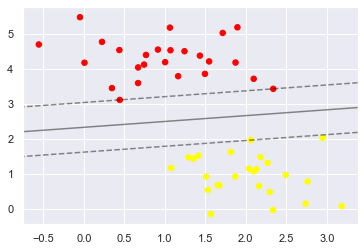

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 50, random_state = 0, centers = 2, cluster_std = 0.6)

from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors = 'k', linestyles = ['--', '-', '--'], alpha = 0.5, levels = [-1, 0, 1])
    if plot_support:
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], facecolor = 'none', linewidth = 1, s =300)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], s = 30, cmap = 'autumn', c = y)
plot_svc_decision_function(model)

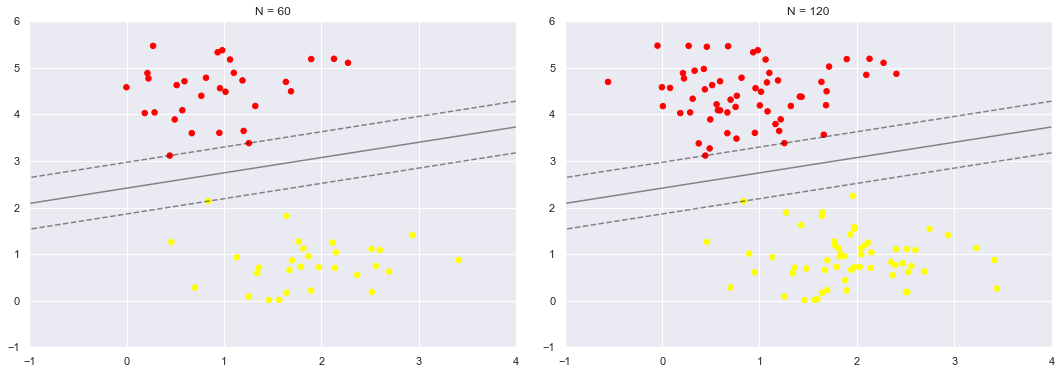

In [3]:
def plot_svm(ax = None, N = 10):
    X, y = make_blobs(n_samples = 200, centers = 2, cluster_std = 0.6, random_state = 0)
    X = X[:N]
    y = y[:N]
    
    ax = ax or plt.gca()
    model = SVC(kernel = 'linear', C = 1E10)
    model.fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], s = 30, c = y, cmap = 'autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
f, axes = plt.subplots(1, 2, figsize = (16, 6))
f.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(axes, [60, 120]):
    plot_svm(axi, N)
    axi.set_title('N = {0}'.format(N))

In [4]:
from ipywidgets import interact, fixed
interact(plot_svm, N = [10, 20, 60, 120], ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 20, 60, 120), value=10), Output()), _dom_classes=…

<function __main__.plot_svm(ax=None, N=10)>

In [6]:
# Fit nonlinear relationships with linear SVClassifier Using Radial basis function
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor = .1, noise = .1)
r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
def plot_3D(elev = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = '3d')
    ax.view_init(elev = elev, azim = azim)
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 30, cmap = 'autumn')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev = (-90, 90), azim = (-180, 180), X = fixed(X), y = fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

C:\Users\Oong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


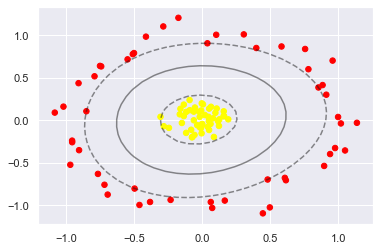

In [20]:
#To classify, we can apply kernelized SVM by using Radial Basis Function (RBF) kernel instead of linear kernel
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'autumn', s = 30)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], lw = 300, facecolor = 'none', s = 300)

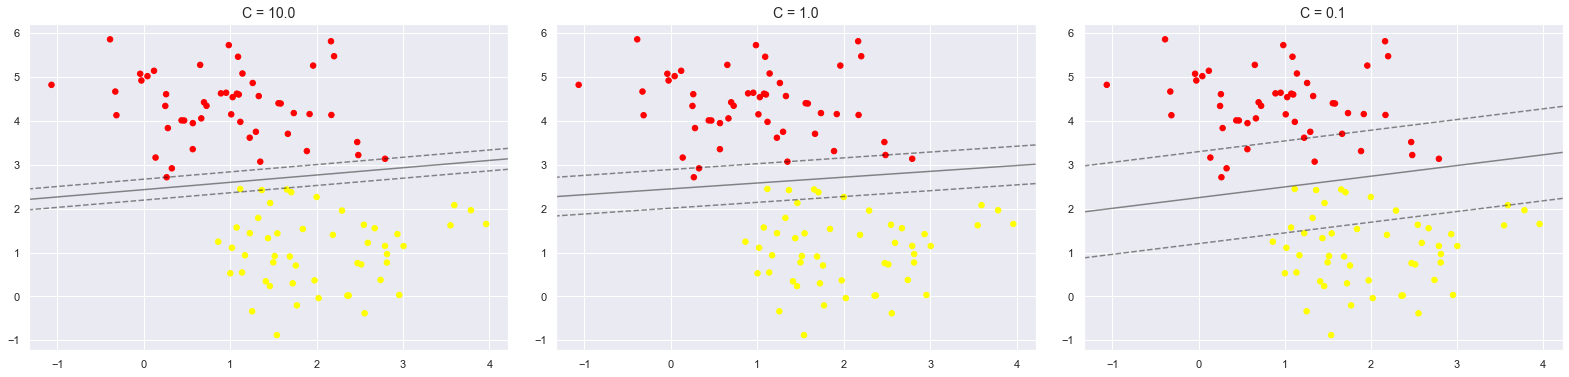

In [27]:
#Softening the margins by tuning C, the fudge-factor that tunes the hardness of the margin
#Optimal C is determined via cross-validation
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples = 100, centers = 2, cluster_std = 0.8, random_state = 0)

f, axes = plt.subplots(1, 3, figsize = (24, 6))
f.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, C in zip(axes, [10, 1, 0.1]):
    clf = SVC(kernel = 'linear', C = C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, cmap = 'autumn', s = 30)
    plot_svc_decision_function(clf, axi)
    axi.set_title('C = {0:.1f}'.format(C), size = 14)

In [21]:
#Facial Recognition
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

pca = PCA(n_components = 150, whiten = True, random_state = 0)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
grid_params = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
model = make_pipeline(pca, svc)
grid = GridSearchCV(model, grid_params) 

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\Oong\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Oong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'svc__C': 50, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
y_pred = model.predict(Xtest)

f, axes = plt.subplots(4, 6)
for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(62,47), cmap = 'bone')
    ax.set(xticks = [], yticks = [])
    ax.set_ylabel(faces.target_names[ytest[i]].split()[-1], color = 'black' if ytest[i] == y_pred[i] else 'red')

In [35]:
print(classification_report(ytest, y_pred, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.78      0.82      0.80        68
  Donald Rumsfeld       0.72      0.74      0.73        31
    George W Bush       0.88      0.84      0.86       126
Gerhard Schroeder       0.83      0.83      0.83        23
      Hugo Chavez       1.00      0.70      0.82        20
Junichiro Koizumi       0.92      0.92      0.92        12
       Tony Blair       0.80      0.88      0.84        42

         accuracy                           0.82       337
        macro avg       0.82      0.81      0.81       337
     weighted avg       0.83      0.82      0.82       337



(8.0, 0.0)

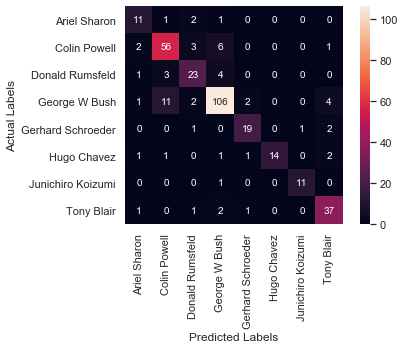

In [38]:
mat = confusion_matrix(ytest, y_pred)
ax = sb.heatmap(mat, annot = True, fmt = 'd', xticklabels = faces.target_names, yticklabels = faces.target_names, 
                square = True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)